Universidade Federal de Santa Catarina<br>
Departamento de Engenharia El√©trica e Eletr√¥nica<br>
EEL7514/EEL7513/EEL410250 - Aprendizado de M√°quina
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\RR}{\mathbb{R}}$


# Exerc√≠cio 4: Regress√£o Log√≠stica

Neste exerc√≠cio voc√™ ir√° aplicar um classificador de regress√£o log√≠stica em diversos conjuntos de dados. 
Al√©m disso, voc√™ ir√° explorar a adi√ß√£o de atributos polinomiais e a utiliza√ß√£o de regulariza√ß√£o, bem como outras formas de avalia√ß√£o de classificadores bin√°rios. Finalmente, voc√™ ir√° investigar t√©cnicas de classifica√ß√£o multi-classe.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gen_data(n_samples=20, n_classes=2, overlap=0, x_scale=[0,1], random_state=None):
    '''Generate 1-D classification dataset'''
    assert overlap <= 1
    rng = np.random.RandomState(random_state)
    X = np.zeros((n_samples,1))
    y = np.zeros(n_samples)
    for i in range(n_samples):
        k = i % n_classes
        X[i,0] = (k*(1-overlap) + rng.rand())/((n_classes-1)*(1-overlap) + 1)
        y[i] = k
    X = x_scale[0] + (x_scale[1]-x_scale[0])*X
    return X, y

def plot_data(X, y, colors=['bo','rx','gs','md','c^','yP']):
    ''' Plot 1-D or 2-D classification dataset '''
    assert len(X.shape) == 2 and len(y.shape) == 1
    classes = np.unique(y)
    assert len(classes) <= len(colors)
    dim = X.shape[1]
    assert 0 < dim <= 2
    if dim == 1:
        for i in range(len(classes)):
            plt.plot(X[y==classes[i],0], np.zeros(np.sum(y==classes[i])), colors[i])
        plt.gca().axes.get_yaxis().set_ticks([])
    else:
        for i in range(len(classes)):
            plt.plot(X[y==classes[i],0], X[y==classes[i],1], colors[i])
    return

def plot_boundary(model, X, colors=['b','r','g','m','c','y'], N=400, gap=1e-9):
    ''' Plot boundary for a 1-D or 2-D classifier '''
    assert len(X.shape) == 2 and len(y.shape) == 1
    dim = X.shape[1]
    assert 0 < dim <= 2
    x1_min, x1_max = X[:,0].min()-gap, X[:,0].max()+gap
    if dim == 1:
        x2_min, x2_max = -1, 1
        N2 = 2
    else:
        x2_min, x2_max = X[:,1].min()-gap, X[:,1].max()+gap
        N2 = N
    xx1, xx2 = np.meshgrid(np.linspace(x1_min,x1_max,N), np.linspace(x2_min,x2_max,N2))
    if dim == 1:
        X = np.c_[xx1.reshape(-1)]
    else:
        X = np.c_[xx1.reshape(-1), xx2.reshape(-1)]
    y_pred = model.predict(X)
    from sklearn.preprocessing import LabelEncoder
    enc = LabelEncoder()
    y_pred = enc.fit_transform(y_pred)
    assert len(enc.classes_) <= len(colors)
    levels = np.arange(len(enc.classes_)+1)-0.5
    y_pred = y_pred.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_pred, levels, colors=colors, alpha=0.25)
    plt.contour(xx1, xx2, y_pred, levels, colors='k', linewidths=1)
    return

def plot_errors(model, X, y):
    ''' Draws a square around each incorrect prediction '''
    assert len(X.shape) == 2 and len(y.shape) == 1
    dim = X.shape[1]
    assert 0 < dim <= 2
    err = model.predict(X) != y
    vert = np.zeros(np.sum(err))
    if dim == 2:
        vert = X[err,1]
    plt.plot(X[err,0], vert, 'ks', mfc='none', markersize=10)
    return

In [2]:
# More imports

# 1. Conjunto de dados #1

O primeiro conjunto de dados que usaremos pode ser gerado e visualizado pelos comandos abaixo.

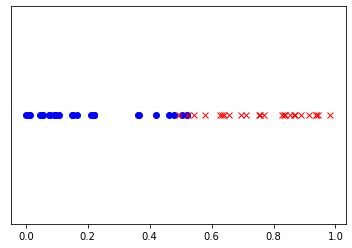

In [64]:
X,y = gen_data(n_samples=50, n_classes=2, overlap=0.1, random_state=1)
plot_data(X, y)

## Classifica√ß√£o linear

1. Treine um classificador de regress√£o log√≠stica sem regulariza√ß√£o e trace um gr√°fico mostrando o conjunto de treinamento e as regi√µes de decis√£o do classificador. 
1. Reporte a acur√°cia (= # de acertos / tamanho do conjunto) do classificador.
1. Determine o valor do limiar de decis√£o a partir dos par√¢metros do modelo.

#### Dicas

- Fun√ß√µes √∫teis:

```python
sklearn.linear_model.LogisticRegression() # utilize penalty='none'
plot_data(), plot_boundary() # fornecidas, utilize os par√¢metros default
LogisticRegression.score(), .coef_, .intercept_
```

-  Caso sua vers√£o do sklearn seja inferior a 0.22, utilize a op√ß√£o `solver='lbfgs'` (padr√£o a partir de 0.22) no `LogisticRegression()`

**<center>1.1. Treine um classificador de regress√£o log√≠stica sem regulariza√ß√£o e trace um gr√°fico mostrando o conjunto de treinamento e as regi√µes de decis√£o do classificador.**

In [65]:
print(X.shape)
y.shape

(50, 1)


(50,)

In [66]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
sklearn.__version__

'0.22.1'

In [67]:
model = LogisticRegression(penalty='none')
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
pred = model.predict(X)
pred

array([0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.])

Training accuracy: 0.96%


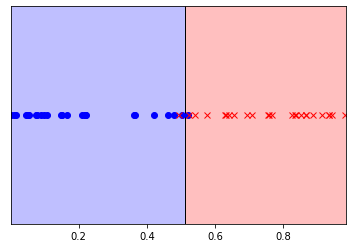

In [69]:
print(f"Training accuracy: {model.score(X,y)}%")
#print(f"Decision threshold: {}")
plot_data(X,y)
plot_boundary(model,X)

#### Resposta do professor
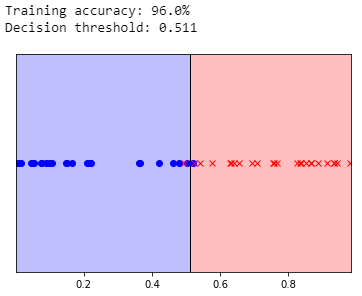

4. Trace o gr√°fico da predi√ß√£o do modelo de regress√£o (i.e., da vari√°vel cont√≠nua $\tilde{y} = \sigma(\bw^T\bx$)) sobre o conjunto de treinamento. Fa√ßa isso de tr√™s formas diferentes e confirme que todas fornecem o mesmo resultado:
 1. Usando a fun√ß√£o `.predict_proba()` do modelo
 1. Escrevendo sua pr√≥pria implementa√ß√£o a partir da fun√ß√£o `.decision_function()`, a qual retorna o score de confian√ßa $z = \bw^T\bx$
 1. Escrevendo sua pr√≥pria implementa√ß√£o a partir dos par√¢metros `.coef_` e `.intercept_`

**<center>A.Usando a fun√ß√£o .predict_proba() do modelo**

In [88]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [59]:
values = np.linspace(0,1,50)
z = model.predict(X)
sig_z = sigmoid(z)

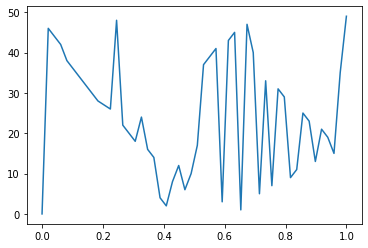

In [62]:
plt.plot(values,np.argsort(sig_z), np.linspace(0.5,0.000005,1))

In [160]:
proba = model.predict_proba(X)*model.coef_ + model.intercept_
norm_proba = (proba - np.mean(proba)) / proba.std()

In [161]:
z= sigmoid(proba)

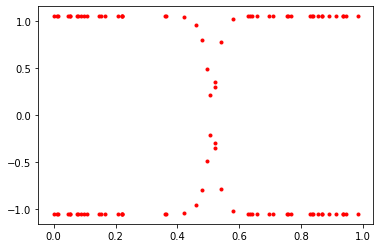

In [162]:
plt.plot(X,norm,'r.')

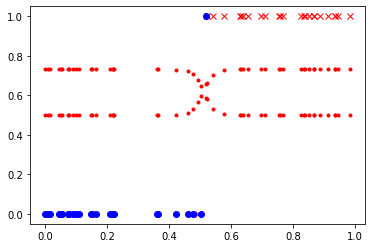

In [163]:
#plt.plot(X,model.predict_proba(X))
plt.plot(X, sigmoid(model.predict_proba(X)),'r.')
plt.plot(X[y==1],pred[y==1],'rx' )
plt.plot(X[y==0],pred[y==0],'bo')

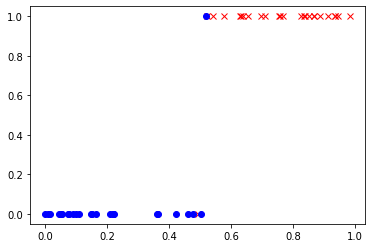

In [164]:
plt.plot(X[y==1],pred[y==1],'rx' )
plt.plot(X[y==0],pred[y==0],'bo')

**<center>B.Escrevendo sua pr√≥pria implementa√ß√£o a partir da fun√ß√£o `.decision_function()`, a qual retorna o score de confian√ßa $z = \bw^T\bx$**

In [202]:
#z = model.decision_function(X)*model.coef_ + model.intercept_
z = model.decision_function(X)

In [203]:
sig = sigmoid(z)

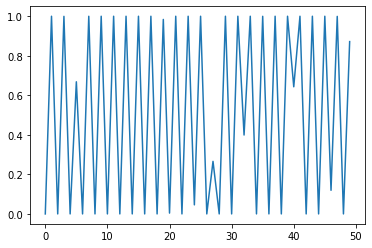

In [204]:
plt.plot(sig)
#plt.plot(X,sig.reshape(50,1),'r.')

ValueError: x and y must have same first dimension, but have shapes (25, 1) and (23,)

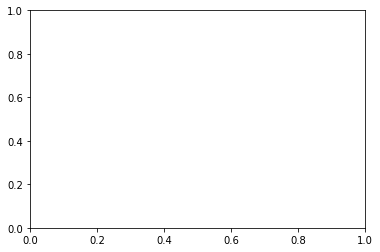

In [156]:
plt.plot(X[y==1],z0,'rx' )

In [166]:
y_pred = []
for c in range(len(z)):
    if z[c] >= 1:
        z[c] = 1
        y_pred.append(z[c])
    else: 
        z[c] = 0
        y_pred.append(z[c])
np.array(y_pred)

array([0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.])

In [167]:
np.all(y) == np.all(y_pred)

True

pr√≥pria implementa√ß√£o

In [78]:
sig = sigmoid=(z)
norm_sig = (sig - np.mean(sig)) / np.std(sig)

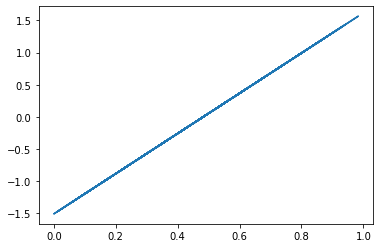

In [82]:
plt.plot(X,norm_sig)

#### Resposta do professor
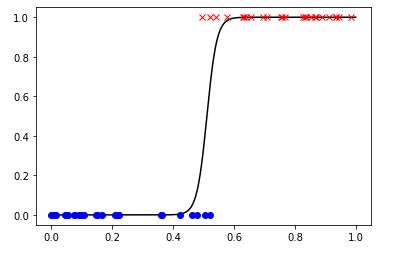

5. Varie o grau de sobreposi√ß√£o no gerador do conjunto de dados (par√¢metro `overlap`) e repita o gr√°fico da predi√ß√£o do item anterior. Para facilitar, copie e cole todos os comandos e os organize em um `for` (ou, se preferir, utilize `ipywidgets.interact`). Utilize o mesmo `seed` do gerador de n√∫meros aleat√≥rios em todos os casos (par√¢metro `random_state` da fun√ß√£o `gen_data()`), para eliminar a variabilidade e assim enfatizar a influ√™ncia do grau de sobreposi√ß√£o.
1. Comente sobre os resultados observados.

**=======================================================================================================================**

# 2. Conjunto de dados #2

O segundo conjunto de dados pode ser gerado pelos comandos abaixo.

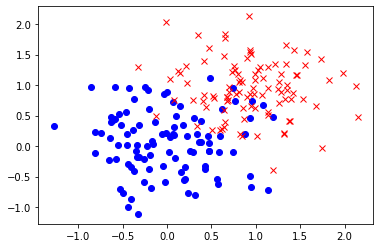

In [10]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, n_features=2, centers=[[0,0],[1,1]], cluster_std=0.5, random_state=0)
plot_data(X, y)

## Classifica√ß√£o linear

1. Treine um classificador de regress√£o log√≠stica sem regulariza√ß√£o e trace um gr√°fico mostrando o conjunto de treinamento e as regi√µes de decis√£o do classificador.
1. Reporte o n√∫mero de itera√ß√µes realizadas pelo otimizador, a acur√°cia do classificador e o vetor de par√¢metros $\bw$ (incluindo o termo de *bias* $w_0 = b$).
1. Adicione regulariza√ß√£o $\ell_2$ e v√° aumentando gradativamente o grau de regulariza√ß√£o ($\lambda$) e observando seu impacto no vetor $\bw$. Note que o sklearn utiliza como par√¢metro de regulariza√ß√£o exatamente o inverso, $C = 1/\lambda$.
1. Adicionar regulariza√ß√£o se mostrou √∫til? Por qu√™?

---

**<p>2.1.Treine um classificador de regress√£o log√≠stica sem regulariza√ß√£o e trace um gr√°fico mostrando o conjunto de treinamento e as regi√µes de decis√£o do classificador.**
**<p>2.2. Reporte o n√∫mero de itera√ß√µes realizadas pelo otimizador, a acur√°cia do classificador e o vetor de par√¢metros  ùê∞  (incluindo o termo de bias  ùë§0=ùëè ).**

Resposta do professor:
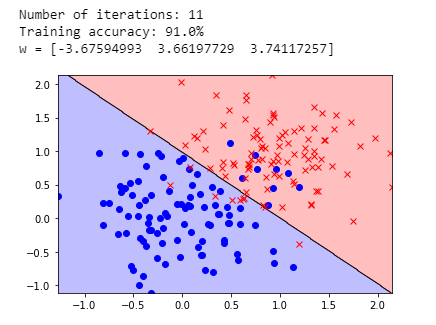

In [11]:
model = LogisticRegression(penalty='none')
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
print(X.shape)
y.shape

(200, 2)


(200,)

In [13]:
w = np.ones(3)
w[0] = model.intercept_
w[1] = model.coef_[0][0]
w[2] = model.coef_[0][1]

Number of iterations: 11
Train accuracy: 91.0%
w = [-3.67594993  3.66197729  3.74117257]


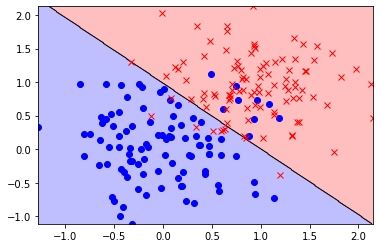

In [14]:
print(f"Number of iterations: {int(model.n_iter_)}")
print(f"Train accuracy: {model.score(X,y)*100}%")
print(f"w = {w}")
plot_boundary(model,X)
plot_data(X,y)

**2.3.Adicione regulariza√ß√£o  ‚Ñì2  e v√° aumentando gradativamente o grau de regulariza√ß√£o ( ùúÜ ) e observando seu impacto no vetor  ùê∞ . Note que o sklearn utiliza como par√¢metro de regulariza√ß√£o exatamente o inverso,  ùê∂=1/ùúÜ .**

In [33]:
from ipywidgets import interact

@interact(C = (1e-7,1.0,1e-7))
def train(C):
    model = LogisticRegression(penalty='l2', C=C)
    model.fit(X,y)
    plot_data(X,y)
    
    w = np.ones(3)
    w[0] = model.intercept_
    w[1] = model.coef_[0][0]
    w[2] = model.coef_[0][1]
    
    #print(model)
    plot_boundary(model, X) 
    print(model)
    print(f"Number of iterations: {int(model.n_iter_)}")
    print(f"Train accuracy: {model.score(X,y)*100}%")
    print(f"w = {w}")

interactive(children=(FloatSlider(value=0.5, description='C', max=1.0, min=1e-07, step=1e-07), Output()), _dom‚Ä¶

**Adicionar regulariza√ß√£o se mostrou √∫til? Por qu√™.**
Apenas reduz as itera√ß√µes

## Implementa√ß√£o em Python

Escreva uma implementa√ß√£o pr√≥pria do classificador, completando a classe abaixo. Esta implementa√ß√£o √© parcialmente compat√≠vel com o sklearn; em particular, as classes herdadas permitem automaticamente a utiliza√ß√£o da fun√ß√£o `.score()`. Para realizar o treinamento utilizaremos o otimizador do SciPy com o m√©todo BFGS (padr√£o do SciPy para problemas sem restri√ß√µes), um m√©todo [quase-Newton](https://en.wikipedia.org/wiki/Quasi-Newton_method) que requer apenas o c√°lculo do gradiente.

5. Complete as fun√ß√µes `decision_function`, `predict_proba` (que voc√™ j√° implementou acima) e `predict`.
1. Complete a fun√ß√£o objetivo da otimiza√ß√£o `_fobj`. Esta fun√ß√£o deve retornar o valor da fun√ß√£o custo e do gradiente no ponto atual ($\bw$).
1. Repita os itens da se√ß√£o anterior com o seu classificador e compare com a vers√£o do sklearn. Confirme que o valor da acur√°cia √© id√™ntico e os valores de $\bw$ s√£o muito pr√≥ximos (at√© pelo menos o terceiro d√≠gito significativo).

Ap√≥s essa parte, voc√™ pode ignorar a sua implementa√ß√£o e passar a usar a implementa√ß√£o do sklearn.

#### Dicas
- Ao inv√©s de implementar a fun√ß√£o log√≠stica, utilize a implementa√ß√£o do SciPy (possivelmente renomeando para um nome mais conveniente):
```python
from scipy.special import expit as sigmoid
```
- Adicione um valor pequeno e positivo (ex: `eps = 1e-200`) dentro do argumento do `np.log()` para evitar erros quando o argumento √© igual a zero.

In [34]:
w = np.ones(3)
np.c_[w]

array([[1.],
       [1.],
       [1.]])

In [12]:
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.special import expit as sigmoid

class Model(BaseEstimator, ClassifierMixin):
    ''' Logistic regression with L2 regularization '''
    def __init__(self, lamb=0):
        self.lamb = lamb
        return
    
    def _add_ones(self, X):
        # Add column of ones
        X_new = np.c_[np.ones(X.shape[0]), X]
        return X_new

    def _fobj(self, w, X, y):
        # Compute cost and gradient for optimization
        eps = 1e-200
        ???
        return J, grad
    
    def fit(self, X, y):
        # Fit using BFGS solver (SciPy's default)
        from scipy.optimize import minimize
        X = self._add_ones(X)
        res = minimize(fun=self._fobj, x0=np.zeros(X.shape[1]), jac=True, args=(X,y))
        self.w = res.x
        self.n_iter_ = np.array([res.nit])
        self.J = self._fobj(self.w, X, y)[0]
        return self
    
    def decision_function(self, X):
        X = self._add_ones(X)
        ???
        return z
    
    def predict_proba(self, X):
        ???
        return y_tilde

    def predict(self, X):
        y_pred = (self.decision_function(X) ???).astype(int)
        return y_pred

In [124]:
np.c_[w]
np.c_[w]

array([[1.],
       [1.],
       [1.]])

# 3. Conjunto de dados #3

O pr√≥ximo conjunto de dados √© gerado pelos comandos abaixo. Note que agora temos tamb√©m conjuntos de valida√ß√£o e de teste (extremamente grandes para fins did√°ticos).

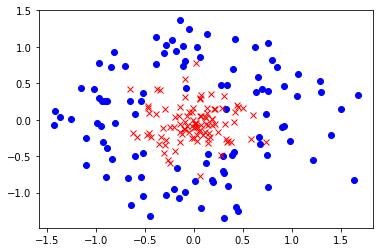

In [15]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=200, noise=0.28, factor=0, random_state=4)
X_val, y_val = make_circles(n_samples=10000, noise=0.28, factor=0, random_state=5)
X_test, y_test = make_circles(n_samples=10000, noise=0.28, factor=0, random_state=6)
plot_data(X,y)

## Adicionando atributos

1. Inicialmente, treine o classificador sem regulariza√ß√£o, trace o gr√°fico das regi√µes de decis√£o e reporte o n√∫mero de itera√ß√µes, bem como a acur√°cia nos conjuntos de treinamento e de valida√ß√£o.
1. Aprimore o modelo adicionando atributos polinomiais, at√© obter 100% de acur√°cia no conjunto de treinamento.
1. Comente sobre o que voc√™ observou, tanto do ponto de vista quantitativo (acur√°cia) quanto qualitativo (formato regi√µes de decis√£o).
1. Em seguida, para o grau encontrado acima, introduza regulariza√ß√£o $\ell_2$ e v√° aumentando gradualmente (desde $\lambda = 10^{-9}$ ou menor) e verifique o comportamento do modelo. Novamente, comente sobre o que voc√™ observou.
1. Qual lhe parece a escolha mais interessante de modelo? Por qu√™?
1. Para o modelo escolhido, me√ßa a acur√°cia no conjunto de teste e compare-a com a de valida√ß√£o.

#### Dicas
- Lembre que n√£o h√° necessidade de incluir o termo constante (*bias*) nos atributos polinomiais adicionados.
- Caso tenha dificuldades de converg√™ncia, voc√™ pode experimentar, por exemplo:
 - aumentar o n√∫mero m√°ximo de itera√ß√µes do otimizador (par√¢metro `max_iter`);
 - utilizar um escalonador de atributos. Experimente aplic√°-lo em diferentes posi√ß√µes no *pipeline* at√© obter os melhores resultados. (No meu caso a melhor escolha foi no in√≠cio.)
- Para acessar o √∫ltimo modelo (o estimador) dentro de um *pipeline*, utilize `model.steps[-1][1]`

# 4. Conjunto de dados #4

O pr√≥ximo conjunto de dados √© gerado pelos comandos abaixo.

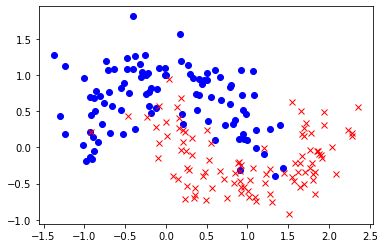

In [20]:
from sklearn.datasets import make_moons

np.random.seed(2019*2)
X, y = make_moons(n_samples=200, noise=0.25)
X_val, y_val = make_moons(n_samples=10000, noise=0.25)
X_test, y_test = make_moons(n_samples=10000, noise=0.25)
plot_data(X, y)

## Desenvolvimento do modelo

1. Desenvolva um bom classificador de regress√£o log√≠stica, da forma que achar mais adequada.
1. Justifique a sua escolha. Em particular, voc√™ consegue justificar que o modelo n√£o est√° sofrendo nem de underfitting nem de overfitting?

## Avalia√ß√£o do modelo

Todos os itens abaixo se referem ao modelo escolhido no item anterior, o qual n√£o deve ser mais alterado.

3. Para o modelo escolhido, me√ßa a acur√°cia de teste. 
1. Calcule a matriz de confus√£o sobre o conjunto de valida√ß√£o.
1. Calcule a taxa de verdadeiro positivo e a taxa de falso positivo.
1. Trace o gr√°fico da curva ROC.
1. Determine a menor taxa de falso positivo tal que a taxa de falso negativo seja de no m√°ximo 5%. Determine tamb√©m o valor do limiar de decis√£o correspondente.
1. (OPCIONAL) Qual par√¢metro deve ser modificado no modelo para que obtenha as taxas do item anterior?
1. (OPCIONAL) Compare a abordagem acima com a seguinte abordagem: treine novamente o modelo, variando os pesos do par√¢metro `class_weight`, at√© conseguir a taxa de falso negativo desejada. Quais lhe parecem ser as vantagens e desvantagens dessa abordagem?

#### Dicas
- Fun√ß√µes √∫teis:
```python
from sklearn.metrics import confusion_matrix, roc_curve
np.where(), np.nonzero()
```

# 5. Conjunto de dados #5

O pr√≥ximo [conjunto de dados](https://scikit-learn.org/stable/datasets/index.html#iris-dataset) √© real: foi introduzido R. A. Fisher em 1936 e tornou-se um cl√°ssico da √°rea, sendo muito utilizado at√© hoje por quem est√° iniciando. Consiste de 4 atributos medidos de 150 amostras de 3 esp√©cies de flores do g√™nero √≠ris.

O objetivo √© distinguir entre as 3 esp√©cies, i.e., trata-se de um problema de classifica√ß√£o multi-classe. O conjunto de dados √© pequeno e o objetivo do exerc√≠cio √© apenas ilustrar a classifica√ß√£o multi-classe; assim, utilize todo o conjunto de dados como conjunto de treinamento.

O conjunto de dados pode ser carregado pelos comandos abaixo.

In [28]:
from sklearn.datasets import load_iris
data = load_iris()
print(data['feature_names'])
print(data['target_names'])
X = data['data']
y = data['target']
print(X.shape, y.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4) (150,)


## Classifica√ß√£o multi-classe: regress√£o log√≠stica one-vs-rest

1. Treine um classificador linear (i.e., com os atributos originais) por regress√£o log√≠stica sem regulariza√ß√£o, e reporte a acur√°cia e a matriz de confus√£o. Inicialmente, utilize a op√ß√£o `multi_class='ovr'` (one-vs-rest).
1. Escolha dois atributos e considere um conjunto de dados simplificado contendo apenas esses dois atributos (para permitir a visualiza√ß√£o). Treine, calcule a acur√°cia e trace as regi√µes de decis√£o. Qual par de atributos permitiu a maior acur√°cia?

## Classifica√ß√£o multi-classe: regress√£o softmax

3. Agora, substitua pela op√ß√£o `multi_class='multinomial'` e repita os itens da se√ß√£o anterior. Voc√™ percebeu alguma diferen√ßa?

## (OPCIONAL) Implementa√ß√£o em Python

4. Escreva uma implementa√ß√£o pr√≥pria da classifica√ß√£o *one-vs-rest* e confirme que o resultado √© id√™ntico ao do sklearn. Note que isso envolve utilizar $K=3$ classificadores bin√°rios distintos, cada um treinado sobre um conjunto de dados com vari√°vel de sa√≠da $y_k$ correspondente ao $k$-√©simo elemento do vetor resultante da binariza√ß√£o (*one-hot encoding*) do r√≥tulo da classe, i.e., $y \in \{0,1,\ldots,K-1\} \mapsto \by = (y_0,\ldots,y_{K-1})$. Nesse caso, escolhe-se como predi√ß√£o a classe que possui maior valor de discriminante, obtido pela fun√ß√£o `decision_function`. Para facilitar, uma implementa√ß√£o parcial √© fornecida abaixo.

#### Dicas
- Fun√ß√µes √∫teis:
```python
np.argmax()
from sklearn.preprocessing import label_binarize
```
- Uma implementa√ß√£o completa, incluindo a fun√ß√£o `.fit()`, √© fornecida em `sklearn.multiclass.OneVsRestClassifier`

In [33]:
from sklearn.base import BaseEstimator, ClassifierMixin

class OneVsRest(BaseEstimator, ClassifierMixin):
    ''' One-Vs-Rest Classification '''    
    def __init__(self, classifiers):
        self.classifiers = classifiers # list of *already fitted* binary classifiers
        return
       
    def predict(self, X):
        z = np.zeros((X.shape[0],len(self.classifiers)))
        for k in range(len(self.classifiers)):
            z[:,k] = ???
        y_pred = ???
        return y_pred

In [ ]:
from sklearn.preprocessing import label_binarize
y_bi = ???
models = [[]]*3
for k in range(3):
    models[k] = ???
    ???

model = OneVsRest(models)
model.score(X, y)

# 6. (OPCIONAL) Conjunto de dados #6

Para investigar a diferen√ßa entre a classifica√ß√£o one-vs-rest e softmax, utilize o conjunto de dados abaixo.

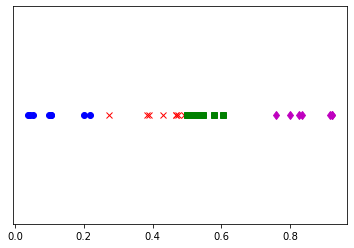

In [35]:
X, y = gen_data(n_samples=30, n_classes=4, overlap=0, random_state=1)
plot_data(X, y)

1. Compare a acur√°cia e as regi√µes de decis√£o para os dois tipos de classifica√ß√£o.
1. Para tentar investigar a raz√£o das diferen√ßas, trace a curva de predi√ß√£o da regress√£o para cada classe ($\tilde{y}_k$), para cada m√©todo.
 1. Para o m√©todo one-vs-rest, parta da fun√ß√£o `.decision_function()`
 1. Para o m√©todo softmax, utilize a fun√ß√£o `.predict_proba()`
1. A partir destes resultados, como voc√™ explicaria as diferen√ßas entre os m√©todos? Em que tipo de situa√ß√£o voc√™ espera que as diferen√ßas fiquem mais pronunciadas?